In [75]:
import os

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(f'{os.getcwd()}\\weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [8]:
df.head()

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


1. Определите самый холодный год, в котором средняя температура была минимальная и самый теплый год.

In [26]:
means = df.groupby(pd.Grouper(key='Day', freq='1YS')).mean()['t']

In [28]:
print('coldest year: ', means.idxmin().year)
print('hottest year: ', means.idxmax().year)

coldest year:  2012
hottest year:  2015


2. Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [76]:
df_jan = df[(df.t >= 0) & (df.Day.dt.month == 1)]
df_jan['col'] = [1] * 73
df_jan.groupby(pd.Grouper(key='Day', freq='1MS'))['col'].sum().idxmax().year

2008

3. В каком году было самое холодное лето (по средней температуре)

In [98]:
df_summer = df[(df.Day.dt.month == 6) | (df.Day.dt.month == 7) | (df.Day.dt.month == 8)]
df_summer.groupby(pd.Grouper(key='Day', freq='3MS')).mean()['t'].idxmin().year

2008

4. Найдите день с самым большим перепадом температуры, если сравнивать со следующим днем.

In [99]:
differences = df['t'].diff().abs()
df.iloc[differences.idxmax()].Day

Timestamp('2014-05-27 00:00:00')

5. Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

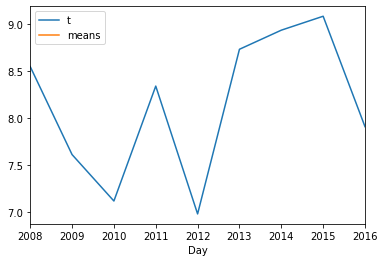

In [100]:
df.groupby(pd.Grouper(key='Day', freq='1YS')).mean().plot()